In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

/home/thakkar_/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


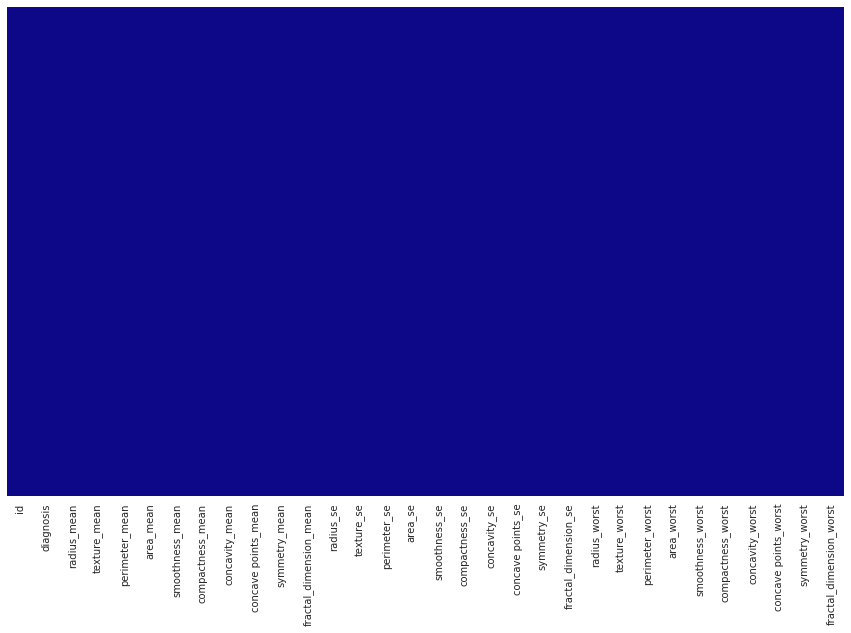

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
sns.heatmap(data = df.isnull(),cmap = 'plasma',yticklabels=False,cbar=False)

In [32]:
df.drop('diagnosis',axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [30]:
def stringToInt(a):
    if a == 'M':
        return 0
    else:
        return 1
    
df['diagnosis_int'] = df['diagnosis'].apply(lambda x : stringToInt(x))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [35]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
scaled_data = scaler.transform(df)

In [37]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA( n_components = 2)

In [45]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
x_pca = pca.transform(scaled_data)

In [47]:
scaled_data.shape

(569, 31)

In [48]:
x_pca.shape

(569, 2)

/home/thakkar_/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


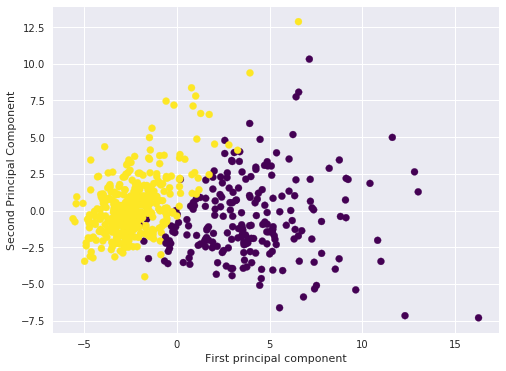

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = df['diagnosis_int'],cmap = 'viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [52]:
from sklearn.svm import SVC

In [53]:
svc = SVC()

In [55]:
from sklearn.model_selection import train_test_split

In [66]:
df_comp = pd.DataFrame(pca.components_,columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_int'])

In [67]:
df_comp

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_int
0,0.216399,0.103599,0.224548,0.217965,0.137645,0.231504,0.251222,0.255266,0.133013,0.057972,...,0.105019,0.233642,0.221970,0.125301,0.204476,0.223075,0.246288,0.120663,0.126721,-0.216917
1,-0.226545,-0.058262,-0.207630,-0.223224,0.188760,0.158473,0.067868,-0.027220,0.193220,0.367620,...,-0.045135,-0.192592,-0.211887,0.172476,0.147663,0.103088,-0.002433,0.142062,0.276449,0.077610


In [79]:
X = df.drop('diagnosis_int',axis = 1)
y = df['diagnosis_int']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
pred = svc.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix,classification_report

In [83]:
print(confusion_matrix(y_test,pred))

[[  0  67]
 [  0 121]]


In [85]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        67
          1       0.64      1.00      0.78       121

avg / total       0.41      0.64      0.50       188



/home/thakkar_/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
from sklearn.grid_search import GridSearchCV

In [87]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................................... C=0.1, gamma=0.001 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [88]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[ 65   2]
 [ 13 108]]


In [89]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.83      0.97      0.90        67
          1       0.98      0.89      0.94       121

avg / total       0.93      0.92      0.92       188

